In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

%matplotlib inline

In [2]:
walmart_data = pd.read_csv('Walmart_Store_sales.csv')

In [3]:
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
walmart_data['Weekly_Sales'] = walmart_data['Weekly_Sales'].values.astype(np.int32)

In [5]:
walmart_data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046964e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099860e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533495e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420158e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
walmart_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
walmart_data_grouped_stores = walmart_data.groupby('Store')
store_sales_data = pd.DataFrame(walmart_data_grouped_stores['Weekly_Sales'].sum())
store_sales_data['Std_dev'] = walmart_data_grouped_stores['Weekly_Sales'].std()
store_sales_data['Coeff of Variation'] = walmart_data_grouped_stores['Weekly_Sales'].std()/walmart_data_grouped_stores['Weekly_Sales'].mean()
store_sales_data

,Weekly_Sales,Std_dev,Coeff of Variation
Store,,,
1,222402734,155980.743379,0.100292
2,275382373,237683.660931,0.123424
3,57586666,46319.654141,0.115022
4,299543881,266201.454054,0.127083
5,45475617,37737.989892,0.118669
6,223756059,212525.909482,0.135823
7,81598205,112585.451921,0.197305
8,129951115,106280.826181,0.116953
9,77789152,69028.668224,0.126896


#### max sales is in store 20 and mininmum sales is in store 33.Max standerd deviation for sales is in store 14 and min std deviation is in store 37

In [8]:
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806,0,46.50,2.625,211.350143,8.106


In [9]:
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'])
walmart_2012 = walmart_data.loc[walmart_data['Date'].dt.year == np.int64('2012')]
walmart2012_Q3  = walmart_2012.loc[walmart_data['Date'].dt.month.isin(np.int64(['07', '08', '09']))]
walmart2012_grouped_Q3 = walmart2012_Q3.groupby('Store')
sum_Q3 = walmart2012_grouped_Q3['Weekly_Sales'].sum()

In [10]:
walmart2012_Q2  = walmart_2012.loc[walmart_data['Date'].dt.month.isin(np.int64(['04', '05', '06']))]
walmart2012_grouped_Q2 = walmart2012_Q2.groupby('Store')
sum_Q2 = walmart2012_grouped_Q2['Weekly_Sales'].sum()

In [11]:
Q3_performance = (sum_Q3- sum_Q2)/ sum_Q2
Q3_performance

Store
1    -0.114263
2    -0.107165
3    -0.107174
4    -0.096253
5    -0.123472
6    -0.115189
7    -0.038247
8    -0.088855
9    -0.121524
10   -0.102934
11   -0.099822
12   -0.107316
13   -0.092647
14   -0.175511
15   -0.121833
16   -0.027893
17   -0.107199
18   -0.095931
19   -0.091232
20   -0.104690
21   -0.089177
22   -0.113325
23   -0.064527
24   -0.092423
25   -0.101436
26   -0.060576
27   -0.106331
28   -0.113643
29   -0.128883
30   -0.104446
31   -0.098351
32   -0.082585
33   -0.095402
34   -0.107464
35   -0.046631
36   -0.125234
37   -0.088815
38   -0.105204
39   -0.063969
40   -0.093550
41   -0.067565
42   -0.102180
43   -0.104744
44   -0.069882
45   -0.138892
Name: Weekly_Sales, dtype: float64

#### All stores shown a negative performance in quarter 3 2012,  store 35 shown a better performance

In [12]:
walmart_data['Weekly_Sales'].mean()

1046964.386013986

In [13]:
#Top selling holidays
walmart_top_sales = walmart_data[walmart_data['Weekly_Sales'] > 2000000]
walmart_top_holidays = walmart_top_sales[walmart_top_sales['Holiday_Flag'] == 1].sort_values(by = 'Weekly_Sales', ascending = False)
walmart_top_holidays.Date.value_counts()

2011-11-25    11
2010-11-26    10
2012-10-02     6
2010-12-02     5
2011-11-02     4
2012-07-09     3
2011-09-09     3
2010-10-09     2
2011-12-30     2
Name: Date, dtype: int64

#### Top sellings are occured on 25 -11 and 26 -11, means thanksgiving holidays have great impact on sellings. Superbowl has also good impact.then labour day and then christmas have impacts on sellings

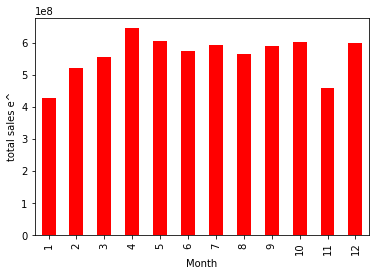

In [14]:
walmart_data['Month'] = walmart_data['Date'].dt.month
walmart_data['Day'] = walmart_data['Date'].dt.day
walmart_data_grouped_month = walmart_data.groupby('Month')
walmart_data_grouped_month['Weekly_Sales'].sum().plot(kind = 'bar', color ='r')
plt.ylabel('total sales e^')
plt.show()

#### we can see that most sales have occur in moth of April and least in january.The first quarter has least sales.November month shows a fall in sales , but october and december has high sales, which make up overall Q4 performance.from the month of april to october we can see almost a steady performance in sales

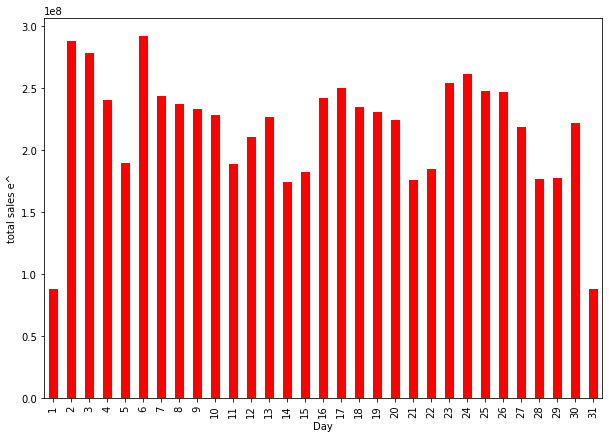

In [15]:
walmart_data_grouped_day = walmart_data.groupby('Day')
walmart_data_grouped_day['Weekly_Sales'].sum().plot(kind = 'bar', color ='r', figsize = (10,7))
plt.ylabel('total sales e^')
plt.show()

#### not much from these graph ...but we can say that the first day and last day of a month shows a drastic fall in sales. people tend to purchase more in the starting of the month usually on second day of month.From the chart we can also analyse that purchases are more on weekdays than holidays( 5 day - 2 day pattern).

In [16]:
walmart_data.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Day
Store,1.000000e+00,-0.335332,6.250842e-20,-0.022659,0.060023,-0.209492,0.223531,3.071631e-19,-3.885248e-19
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,6.753523e-02,-1.487291e-02
Holiday_Flag,6.250842e-20,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,3.322341e-01,-3.603594e-02
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,6.643970e-02,8.901925e-02
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,-5.283174e-02,3.253169e-02
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,1.478843e-03,3.965821e-03
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-2.061552e-03,-8.166853e-03
Month,3.071631e-19,0.067535,3.322341e-01,0.066440,-0.052832,0.001479,-0.002062,1.000000e+00,5.959249e-03
Day,-3.885248e-19,-0.014873,-3.603594e-02,0.089019,0.032532,0.003966,-0.008167,5.959249e-03,1.000000e+00


#### CPI, Unemployement have a negative impact on sales, and fuel price havea slight positive correlation with sales

In [17]:
walmart_data.drop('Date', axis = 1, inplace = True)
walmart_data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Day
0,1,1643690,0,42.31,2.572,211.096358,8.106,5,2
1,1,1641957,1,38.51,2.548,211.242170,8.106,12,2
2,1,1611968,0,39.93,2.514,211.289143,8.106,2,19
3,1,1409727,0,46.63,2.561,211.319643,8.106,2,26
4,1,1554806,0,46.50,2.625,211.350143,8.106,5,3


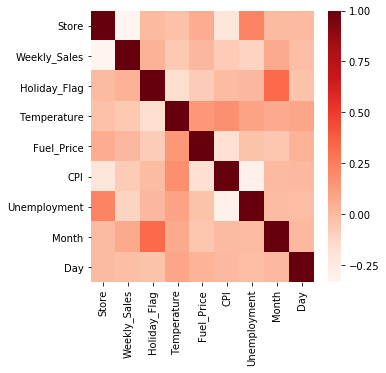

In [18]:
plt.figure(figsize = (5, 5))
sns.heatmap(walmart_data.corr(), cmap = 'Reds')
plt.show()

In [19]:
X_data = walmart_data.drop(['Weekly_Sales'], axis = 1)

In [20]:
scalar = StandardScaler()

In [21]:
y_data = np.log(walmart_data['Weekly_Sales'])

In [22]:
scalar.fit_transform(X_data)

array([[-1.69397911, -0.27420425, -0.99513556, ...,  0.05696366,
        -0.44422923, -1.55946462],
       [-1.69397911,  3.64691651, -1.20117022, ...,  0.05696366,
         1.66322793, -1.55946462],
       [-1.69397911, -0.27420425, -1.12417832, ...,  0.05696366,
        -1.34742516,  0.382676  ],
       ...,
       [ 1.69397911, -0.27420425, -0.33582468, ...,  0.35604577,
         1.66322793, -0.64551609],
       [ 1.69397911, -0.27420425, -0.22738539, ...,  0.35604577,
         1.06109731,  0.382676  ],
       [ 1.69397911, -0.27420425, -0.09834264, ...,  0.35604577,
         1.06109731,  1.18238096]])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)

In [24]:
reg = LinearRegression(normalize = True)

In [25]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [26]:
y_predict = reg.predict(X_test)

In [27]:
y_predict

array([13.94675616, 13.74022564, 13.91188736, ..., 13.57540798,
       13.81925035, 13.87300926])

In [29]:
r2_score( y_test, y_predict)

0.12391219619283045

In [30]:
mean_absolute_error(y_test, y_predict)

0.4621965983241063

In [31]:
mean_squared_error(y_test, y_predict)

0.30908369374294836

In [32]:
y_test.head()

2436    13.945486
3361    14.081599
233     14.386092
3667    13.890284
5011    12.968865
Name: Weekly_Sales, dtype: float64

In [33]:
y_predict[:5]

array([13.94675616, 13.74022564, 13.91188736, 13.8446659 , 13.37691697])

In [34]:
np.exp(y_predict[0])

1140247.7912810585

In [35]:
np.exp(y_test).iloc[0]

1138799.9999999993

### Although our model's r2 value is less, we can see that the errors MAE, MSE are low and seems the model predicts the values almost accurately with test values we can use this model to predict the sales.